# Practice Lab: K-means Clustering


In this practice lab, we're exploring K-means clustering.

## 1. Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Dataset:
### Example: Group users with similar interests
We create a dictionary with the user data and convert it to a pandas DataFrame for easier manipulation.

In [1]:
# Dataset
data = {'User': ['User1', 'User2', 'User3', 'User4', 'User5', 'User6', 'User7', 'User8', 'User9', 'User10', 'User11', 'User12', 'User13', 'User14', 'User15'],
        'Pages Liked': [100, 120, 80, 150, 90, 110,130, 70, 140, 100, 85, 125, 95, 115, 105],
        'Posts Shared': [50, 30, 70, 40, 60, 45, 55, 80, 35, 65, 75, 50, 60, 40, 70]
        }


In [5]:
data.keys()

dict_keys(['User', 'Pages Liked', 'Posts Shared'])

In [6]:
# Convert the data to a DataFrame
df= pd.DataFrame(data)
df

,User,Pages Liked,Posts Shared
0,User1,100,50
1,User2,120,30
2,User3,80,70
3,User4,150,40
4,User5,90,60
5,User6,110,45
6,User7,130,55
7,User8,70,80
8,User9,140,35
9,User10,100,65


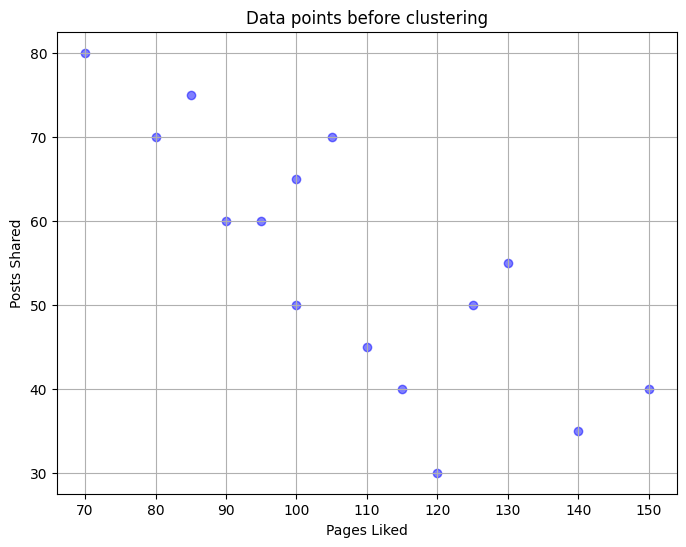

In [7]:
# Plot data before clustering
plt.figure(figsize=(8,6))
plt.scatter(df['Pages Liked'], df['Posts Shared'], color='blue', alpha=0.5)

# Add more
plt.title('Data points before clustering')
plt.xlabel('Pages Liked')
plt.ylabel('Posts Shared')
plt.grid(True)
plt.show()

### 3. Feature Extraction:
We extract the Pages Liked and Posts Shared columns as features for clustering.

In [8]:
# Extract features for clustering
X = df[['Pages Liked', 'Posts Shared']]
X

,Pages Liked,Posts Shared
0,100,50
1,120,30
2,80,70
3,150,40
4,90,60
5,110,45
6,130,55
7,70,80
8,140,35
9,100,65


### 4. Apply K-means Clustering:

We initialize and fit the K-means model with 3 clusters (n_clusters=3) using the features.

In [9]:
# Import
from sklearn.cluster import KMeans


# Create a KMeans object
kmeans = KMeans(n_clusters=3, random_state=0, n_init='auto')

# Apply K-means clustering
kmeans.fit(X)

KMeans(n_clusters=3, random_state=0)

### 5. Add Cluster Labels:

We add the cluster labels assigned by the K-means algorithm to the original DataFrame.

In [12]:
# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_
df

,User,Pages Liked,Posts Shared,Cluster
0,User1,100,50,1
1,User2,120,30,0
2,User3,80,70,2
3,User4,150,40,0
4,User5,90,60,1
5,User6,110,45,1
6,User7,130,55,0
7,User8,70,80,2
8,User9,140,35,0
9,User10,100,65,1


In [13]:
# Final Centroids
centroids = kmeans.cluster_centers_
centroids

array([[130.        ,  41.66666667],
       [100.        ,  58.33333333],
       [ 78.33333333,  75.        ]])

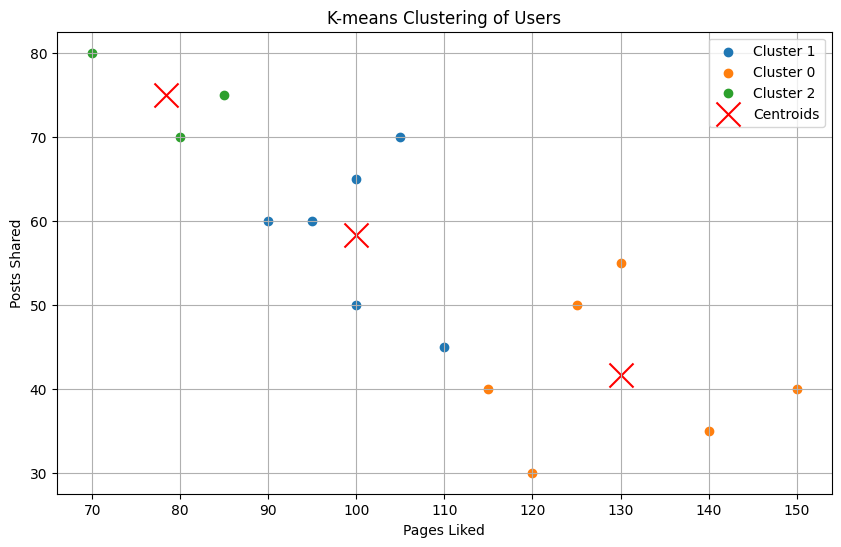

In [14]:
# Plot the clusters

plt.figure(figsize=(10, 6))
for cluster_label in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster_label]
    plt.scatter(cluster_data['Pages Liked'], cluster_data['Posts Shared'], label=f'Cluster {cluster_label}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.title('K-means Clustering of Users')
plt.xlabel('Pages Liked')
plt.ylabel('Posts Shared')
plt.legend()
plt.grid(True)
plt.show()

### 6. Interpretation of Clusters
1. Cluster 1:
- Users in this cluster have high levels of pages liked but relatively low levels of posts shared.
- These users are likely heavy consumers of content, showing a strong interest in exploring various pages.
- However, they are less active in terms of sharing their own content or engaging in discussions.
- This cluster may include users who prefer to consume content passively rather than actively contributing.
2. Cluster 2:
- Users in this cluster have moderate levels of pages liked and posts shared.
- They seem to be moderately engaged with the platform, showing some interest in both consuming content (pages liked) and participating by sharing posts.
- This cluster likely represents the majority of users who are active but not highly active on the platform.
3. Cluster 0:
- Users in this cluster have low level of pages liked, but relatively high level of posts shared.
- This indicates that they might not actively engage with or follow many pages on the platform but they are actively contributing content to the platform by sharing posts.
- These users might be categorized as less active or less engaged compared to users in other clusters.
- These users seem to be more focused on sharing their own content or contributing to discussions rather than passively consuming content from other users or pages.
- This cluster represents a segment of users who are active contributors and promoters of content on the platform, despite having a lower level of engagement with pages.

# What we learnt
- We used the `KMeans` class from the `scikit-learn` library to perform K-means clustering.
- We specified the number of clusters (k=3) as an argument. This indicates that we expect the algorithm to identify three clusters in our data.

- In this case, we found the optimal cluster centers (**centroids**) that minimize the within-cluster variance.

- Then we assigned each data point to its nearest centroid based on some distance metric, typically **Euclidean distance**.

- Also, note that the `fit` function only takes one parameter, `data` (`X`).

-----
## Toy Dataset: Iris Flower Data

The Iris flower data set is a classic dataset in machine learning containing measurements of 150 iris flowers from 3 different species. The features are:
- Sepal length
- Sepal width
- Petal length
- Petal width

## Classification Task

In [16]:
# import the dataset
from sklearn.datasets import load_iris

In [18]:
# Load the Iris dataset: Extract the features
iris = load_iris()
X = iris.data
y = iris.target


In [37]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [29]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Recall:
- 0 corresponds setosa
- 1 corresponds versicolor
- 2 corresponds virginica


Let's visualize the classified data using a scatter plot matrix colored by class.

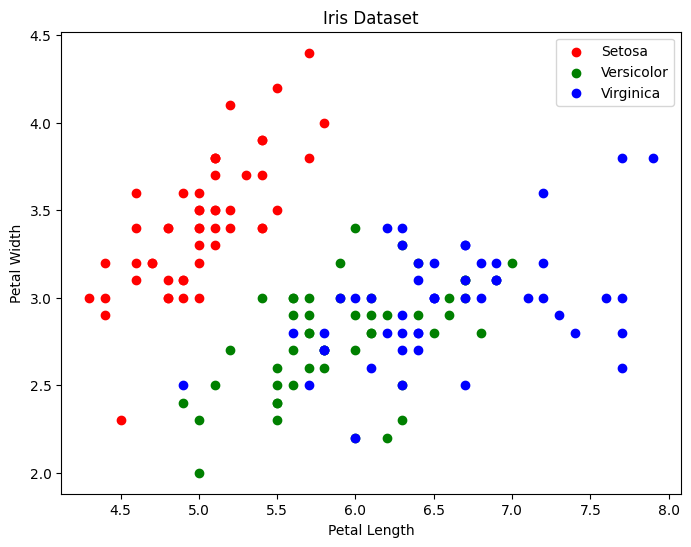

In [44]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data points using only the petal information
ax.scatter(X[y == 0, 0], X[y == 0, 1], color='r', label='Setosa')
ax.scatter(X[y == 1, 0], X[y == 1, 1], color='g', label='Versicolor')
ax.scatter(X[y == 2, 0], X[y == 2, 1], color='b', label='Virginica')

# Add labels and legend
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_title('Iris Dataset')
ax.legend()

plt.show()

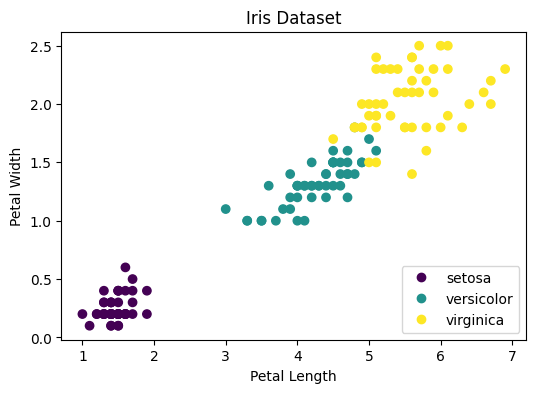

In [26]:
# Alternatively
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the data points using only the sepal information
scatter = ax.scatter(iris.data[:, 2], iris.data[:,3], c=y, cmap= 'viridis')

# Add labels
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_title('Iris Dataset')

#Add legend
ax.legend( scatter.legend_elements()[0], iris.target_names, loc="lower right")

plt.show()

We have created a scatter plot to visualize the Iris dataset, which contains measurements of petal length and petal width for three different species of iris flowers: Setosa, Versicolor, and Virginica

______
# Assignment: Classify the Iris types using KNN machine learning algorithm - Supervised Learning.

That is, using the [KNeigborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).


_____

## Clustering

**Goal**: We will use K-Means to cluster the iris flowers based on two features (Petal Length and the Petal Width).

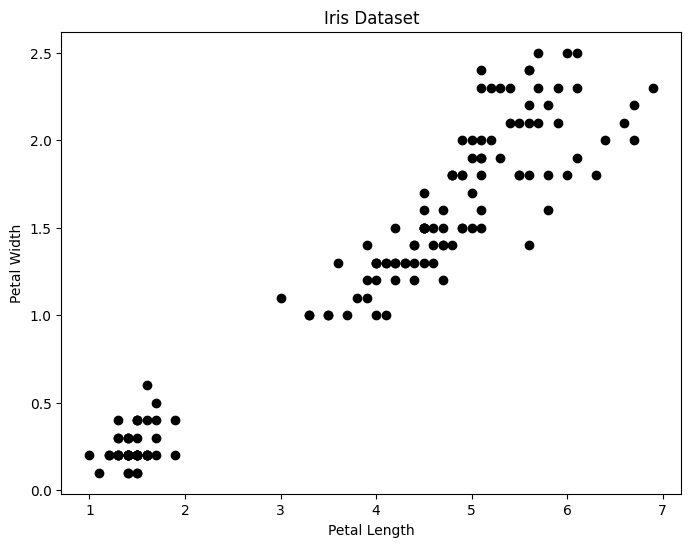

In [27]:
# Data Visualization
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data points
ax.scatter(X[:, 2], X[:, 3], color= 'black')

# Add labels
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_title('Iris Dataset')
plt.show()

 Here we are showing the distribution of petal length versus petal width across all samples, allowing for a general understanding of the dataset's characteristics.

### Idea using K-means Clustering

1. **Select Inputs**: Choose features for clustering.
2. **Choose \( $k$ \) Centers**: Decide on the number of clusters.
3. **Assign to Nearest Centers**: Calculate distances and assign data points.
4. **Update Centers**: Recalculate cluster centroids.
5. **Re-assign Data**: Update data point assignments.
6. **Repeat**: Iterate until convergence.


Step 2: Assume we choose $k=5$, we have

In [45]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
labels = kmeans.fit_predict(X_2)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 4, 3, 4, 3, 3, 4, 0, 4, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 0, 3, 3, 4, 0, 3, 4, 0, 0, 3, 3, 4, 4,
       3, 0, 3, 4, 3, 3, 0, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3], dtype=int32)

In [46]:
# Centriod
centroids= kmeans.cluster_centers_
centroids

array([[4.64857143, 1.5       ],
       [1.462     , 0.246     ],
       [3.83181818, 1.16818182],
       [5.39666667, 2.05333333],
       [6.28461538, 2.13846154]])

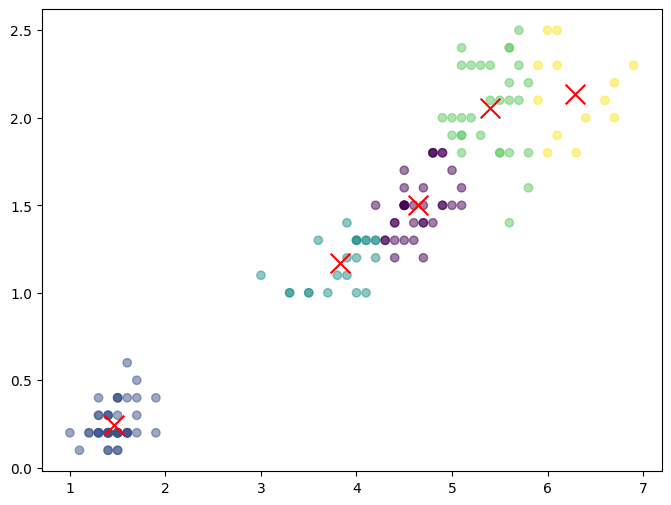

In [47]:
# Plot the clusters and centroids
plt.figure(figsize=(8,6))
plt.scatter(X[:, 2], X[:, 3], c=labels, cmap='viridis', alpha=0.5, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='r', label='Centroids')
plt.show()



_____

**Exercise**: Try to use only the Sepal features.
---

---
## Determining the no. of Clusters Required

### The Elbow Method
**Purpose**: To find the best number of clusters in a dataset, balancing explained variation and avoiding over-fitting.
- The most commonly used metric for the elbow method is the Within-Cluster Sum of Squares (WCSS) or **inertia**.

To use the elbow method with Within-Cluster Sum of Squares (WCSS):
1. **Run K-means clustering** on the dataset for a range of k values (e.g., 1 to 10).
2. **Calculate the WCSS** for each k.
3. **Plot the WCSS values** against the number of clusters k.
4. The optimal k is identified as the point where the WCSS starts to decrease more slowly, forming an "elbow" shape in the plot.

In [72]:
# Define the range of K values (no of clusters)
k_values = range(1,11)
k_values_list = [1,2,3,4,5,6,7,8,9,10]
# Initialize inertia list
inertia_values =[]

for k in k_values:
  # Initialize KMeans with current k
  kmeans = KMeans(n_clusters=k, n_init='auto')
  # Fit the KMeans model
  kmeans.fit(X)
  # Append the inertia values to the list
  inertia_values.append(kmeans.inertia_)

inertia_values

[681.3705999999996,
 152.34795176035797,
 78.85566582597727,
 57.25600931571815,
 50.02108074428957,
 44.07868920520546,
 37.882417748917774,
 35.82227542321277,
 29.055259740259757,
 26.53686802232856]

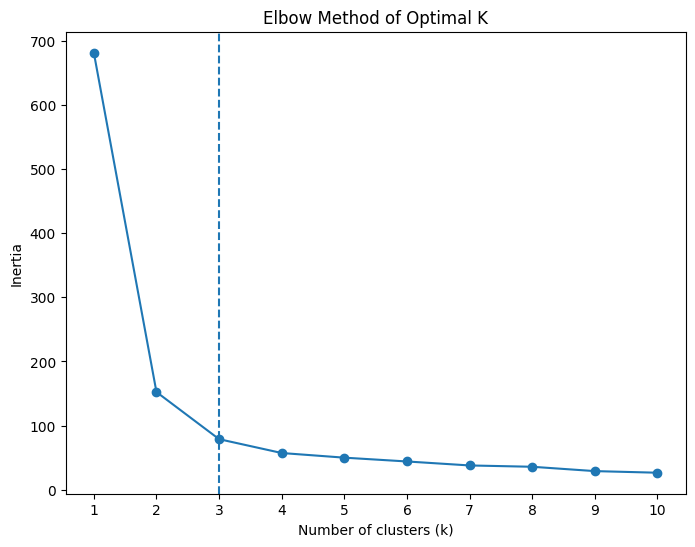

In [73]:
plt.figure(figsize=(8,6))
plt.plot(k_values, inertia_values, marker = 'o', linestyle='-')
plt.axvline(x=3, ls='--')
# Add more
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.title('Elbow Method of Optimal K')

plt.show()

___

### Silhouette Score
Ranges from -1 to +1, where a high value signifies a good match to its own cluster and poor match to neighboring clusters.

In [64]:
k_values = range(2,11)

silhouette_scores = []

In [68]:

silhouette_scores

[0.6857881712617192,
 0.5221721385945112,
 0.47124434677422417,
 0.44577308664982485,
 0.39504003187229036,
 0.3726721039091764,
 0.37397030785993285,
 0.37329553025704515,
 0.34067479336700596]

In [69]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X_2, labels)

0.6260788225776208

___

In [66]:
from sklearn.metrics import silhouette_score
for k in k_values:
  # Initialize KMeans with current k
  kmeans = KMeans(n_clusters=k, n_init='auto', random_state=0)
  # Fit the KMeans model
  kmeans.fit(X_2)
  # Compute the silhoutte score for each cluster
  score = silhouette_score(X, kmeans.labels_)
  # Append the silhouette_scores to the list
  silhouette_scores.append(score)

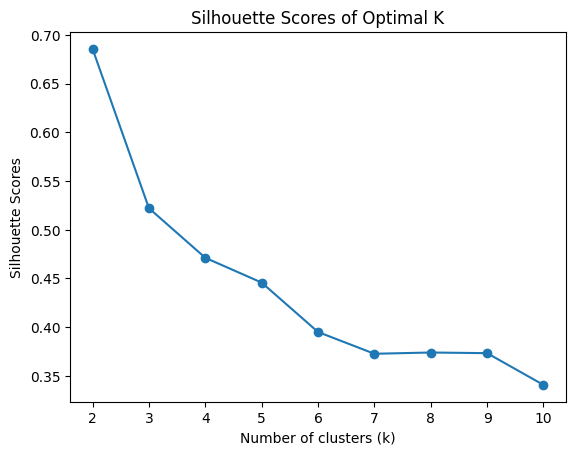

In [67]:
plt.plot(k_values, silhouette_scores, marker = 'o', linestyle='-')
# Add more
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Scores')
plt.xticks(k_values)
plt.title('Silhouette Scores of Optimal K')

plt.show()

## **Rand index** (rand_score)

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings

In [70]:
from sklearn.metrics import rand_score
rand_score(y, labels)


0.8655033557046979